<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im0.png?raw=true" width="600" height="350">

<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im5.png?raw=true" width="600" height="350">

In [1]:
!pip install tensorflow==2.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 KB 13.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0

In [2]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9538015 sha256=40e101853e63841c777ae1572c4aa370e3f37aecc27600ebf1279146d5b3e1b5
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdsta

<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im4.png?raw=true" width="600" height="350">

In [3]:
import pandas as pd
import numpy as np

In [4]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [22]:
data=pd.read_csv("Warehouse.csv")

In [23]:
data.head()

,date,sales,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [24]:
 data = data.rename(columns={'date': 'ds', 'sales':'y'})
data['ds'] = pd.to_datetime(data['ds'])

In [25]:
data.isna().any()

ds       False
y        False
stock    False
price    False
dtype: bool

In [26]:
data.head()

,ds,y,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [27]:
training_data = data[:int(len(data) * 0.8)]
testing_data = data[int(len(data) * 0.8):]

<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im3.png?raw=true" width="600" height="350">

In [29]:
model = Prophet()
model.add_regressor('stock')
model.add_regressor('price')
model.fit(training_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future= model.make_future_dataframe(periods=12, freq='M')

In [31]:
future['stock'] = 0
future['price'] = 0

In [32]:
forecast = model.predict(future)

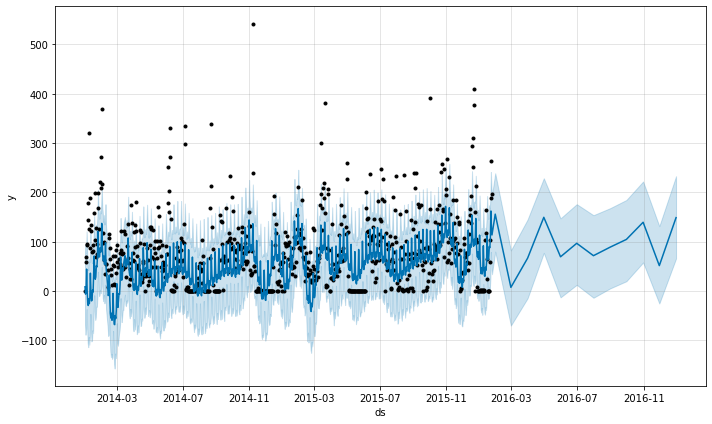

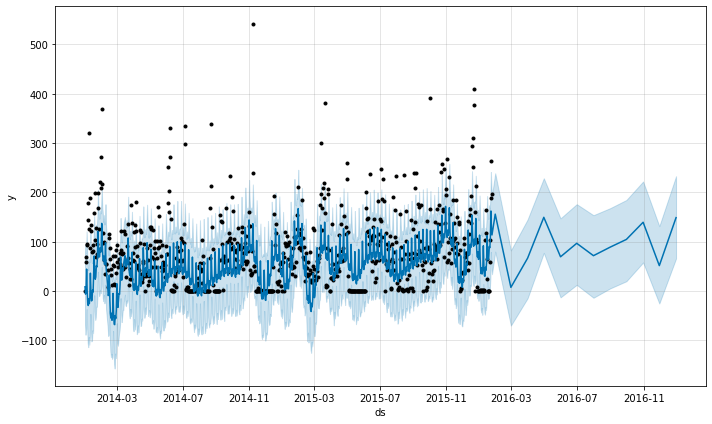

In [33]:
model.plot(forecast)

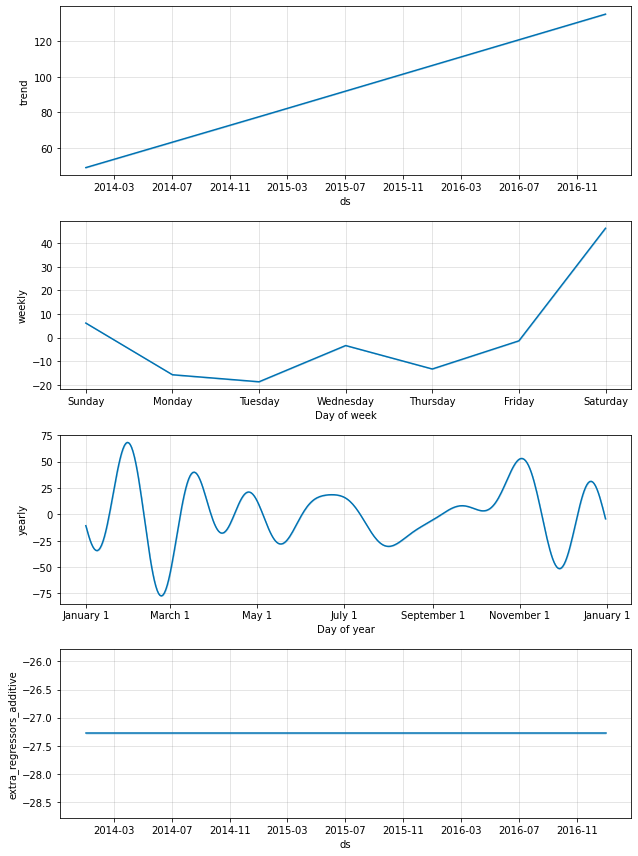

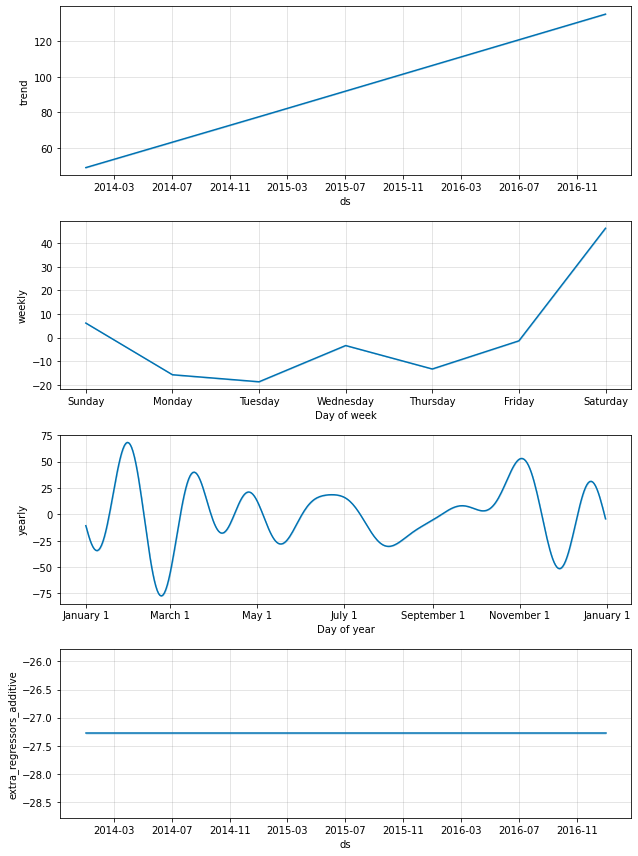

In [34]:
model.plot_components(forecast)


<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im2.png?raw=true" width="600" height="350">

<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im1.png?raw=true" width="600" height="350">

In [35]:
df_cv = cross_validation(model, initial='450 days', period='75 days', horizon = '150 days')
df_p = performance_metrics(df_cv)
print(df_cv.head())
print(df_p.head())

INFO:fbprophet:Making 3 forecasts with cutoffs between 2015-03-31 00:00:00 and 2015-08-28 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0


          ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 2015-04-01   71.140720   -2.275111  142.803461   27 2015-03-31
1 2015-04-02   58.969226  -12.305155  130.294129   27 2015-03-31
2 2015-04-03   64.345834   -7.073907  136.910558   54 2015-03-31
3 2015-04-04  110.228002   37.882005  187.680302  136 2015-03-31
4 2015-04-05   64.619590  -10.235813  139.707261   55 2015-03-31
  horizon          mse       rmse        mae     mdape  coverage
0 15 days  4089.830995  63.951786  44.693107  0.459966  0.844444
1 16 days  4195.937962  64.776060  45.396501  0.459966  0.822222
2 17 days  4319.670385  65.724199  45.901937  0.417803  0.800000
3 18 days  4354.820328  65.991062  46.322981  0.410640  0.800000
4 19 days  5091.507810  71.354802  49.264283  0.417803  0.777778


/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


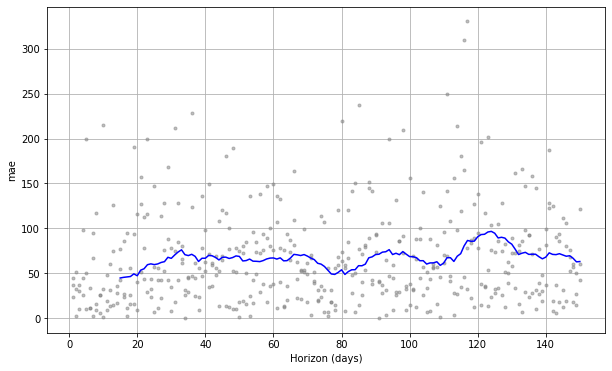

In [36]:
plot_cross_validation_metric(df_cv, metric='mae')
plt.show()

In [37]:
data2=pd.DataFrame(df_cv, columns=["yhat", "y"])

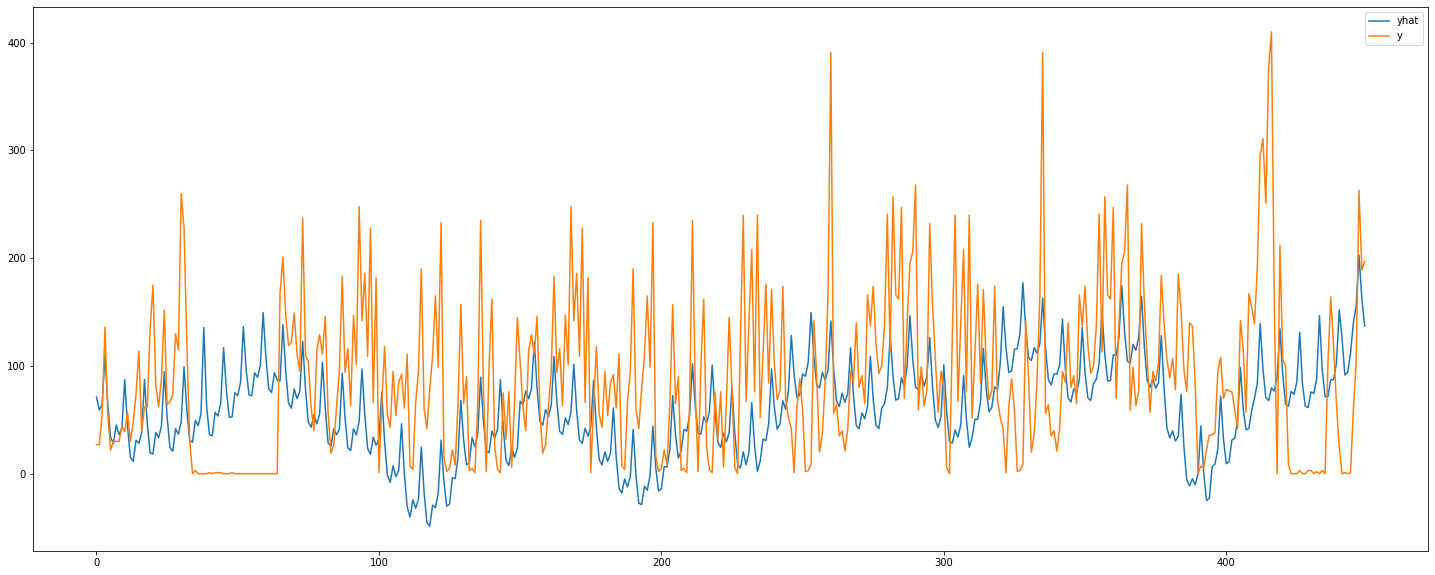

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.plot(data2)
plt.legend(data2)
plt.show()